## Image Classification Model using the Intel Natural Science Dataset

This Image classification model uses the Intel Natural Science dataset to classify 6 different images. The model uses a convolutional neural network to classify the images. 

The dataset was found on Kaggle [here](https://www.kaggle.com/puneet6060/intel-image-classification). It contains over 25,000 images of size 150x150 belonging to 6 categories: buildings, forest, glacier, mountain, sea, and street. 

The model is trained on 14,034 images and tested on 3,000 images. The model had a validation accuracy of 0.7557, which is quite good considering the simplicity of the model.

This model is a great starting point to learn TensorFlow and Keras, as well as using different packages for deep learning. You can find more information on how to build models like this on the [TensorFlow website](https://www.tensorflow.org/tutorials/images/classification).

I personally built this model to learn more about TensorFlow and Keras, and how to use them in practice.

In [97]:
#Image Classification model using Convolutional Neural Network (CNN) for Intel Nature Image Scenes Dataset
import tensorflow as tf
import numpy as np
from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [98]:
# Set the seed for random operations.
epochs = 10
batch_size = 32
# Paths to the dataset (You must enter your own path here after downloading the dataset from your computer).
train_path = ".../seg_train/seg_train/"
test_path = ".../seg_test/seg_test/"


In [99]:
datagen_train  = ImageDataGenerator(rescale = 1.0/255.0)
datagen_val = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = datagen_train.flow_from_directory(train_path,
                                     batch_size = batch_size,
                                     shuffle = True,
                                     target_size= (128,128),
                                     color_mode = 'grayscale',
                                     class_mode = 'categorical'

)
val_generator = datagen_val.flow_from_directory(test_path,
                                 batch_size = batch_size,
                                 shuffle = True,
                                 target_size= (128,128),
                                 color_mode = 'grayscale',
                                 class_mode = 'categorical'

)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [100]:
# Displaying the classes
train_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

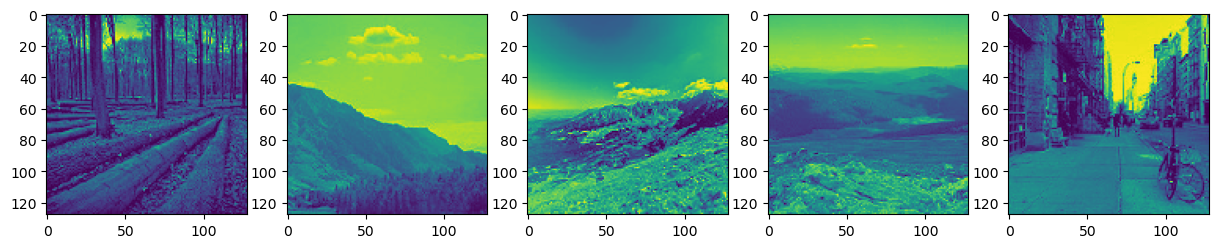

In [101]:
import matplotlib.pyplot as plt
# Visualize the data
x, y = train_generator.next()

# Create a figure with five subplots
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

# Display the first five images in a row of subplots
for i in range(0, 5):
    image = x[i]
    ax[i].imshow(image)

plt.show()


In [102]:
# This is our model architecture
# It is a very simple CNN with two convolution layers, two max pooling layers, 
# a flatten layer and two dense layers.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [103]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 global_average_pooling2d (G  (None, 128)             

In [104]:
model.compile(optimizer='adam', loss = "categorical_crossentropy", metrics=['accuracy'])

In [105]:
from keras.callbacks import ModelCheckpoint

# define the checkpoint
checkpoint_path = "model_checkpoint.h5"
checkpoint = ModelCheckpoint(checkpoint_path, 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')


In [106]:
history = model.fit(train_generator, 
                    validation_data = val_generator,
                    epochs = epochs,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = val_generator.n//val_generator.batch_size,
                    callbacks=[checkpoint]
                    )

Epoch 1/10


2023-04-28 00:59:37.623862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


438/438 [==============================] - ETA: 0s - loss: 1.3636 - accuracy: 0.4225

2023-04-28 00:59:49.279990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.54099, saving model to model_checkpoint.h5
438/438 [==============================] - 13s 29ms/step - loss: 1.3636 - accuracy: 0.4225 - val_loss: 1.1822 - val_accuracy: 0.5410
Epoch 2/10
438/438 [==============================] - ETA: 0s - loss: 1.0942 - accuracy: 0.5526
Epoch 2: val_accuracy did not improve from 0.54099
438/438 [==============================] - 13s 29ms/step - loss: 1.0942 - accuracy: 0.5526 - val_loss: 1.1267 - val_accuracy: 0.5353
Epoch 3/10
438/438 [==============================] - ETA: 0s - loss: 0.9675 - accuracy: 0.6199
Epoch 3: val_accuracy improved from 0.54099 to 0.64348, saving model to model_checkpoint.h5
438/438 [==============================] - 13s 29ms/step - loss: 0.9675 - accuracy: 0.6199 - val_loss: 0.9023 - val_accuracy: 0.6435
Epoch 4/10
437/438 [============================>.] - ETA: 0s - loss: 0.9109 - accuracy: 0.6482
Epoch 4: val_accuracy improved from 0.64348 to 0.65860, saving model to model_ch

1/1 [==============================] - 0s 220ms/step


2023-04-28 01:01:44.681665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


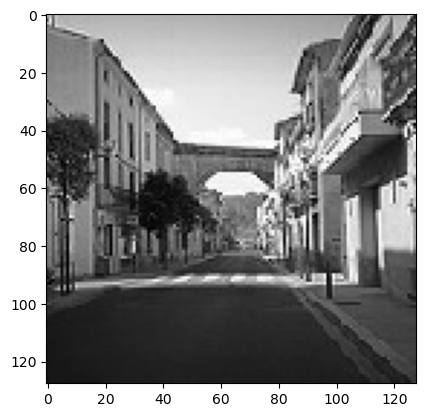

Model prediction: 5


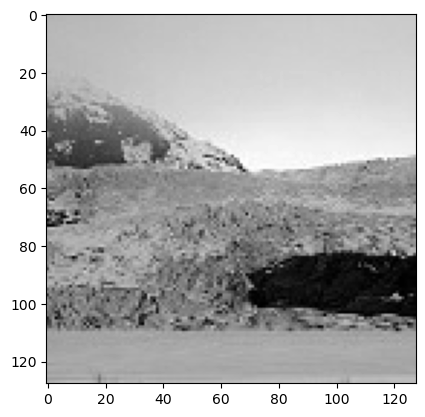

Model prediction: 2


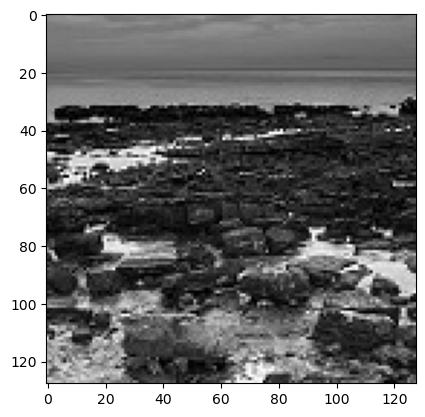

Model prediction: 4


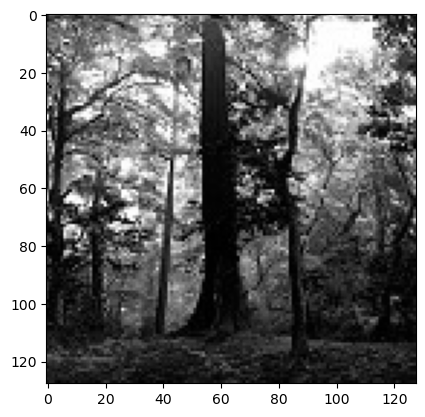

Model prediction: 1


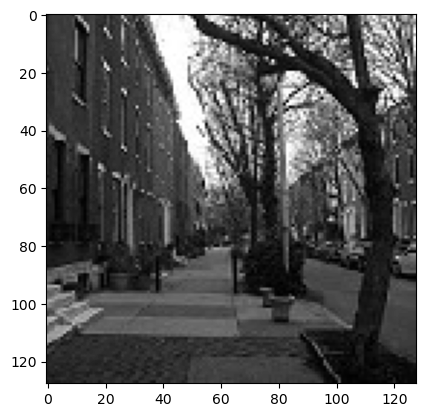

Model prediction: 5


In [107]:
# Using our previously found indices we can determine whether our model works with the images below 
# We can just use the numbers associated with the category and visually check
"""{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}"""
from keras.models import load_model
# Load the saved Keras model
model = load_model('model_checkpoint.h5')

# Predict on 5 images from validation set
n_images = 5
images, labels = val_generator.next()
test_images = images[:n_images]
predictions = model.predict(test_images)

# Display images and model predictions
for i in range(n_images):
    plt.imshow(test_images[i], cmap='gray')
    plt.show()
    print(f"Model prediction: {np.argmax(predictions[i])}")